# (1) Read in Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

github_csv_url = 'https://raw.githubusercontent.com/jacobalcu/Telco-Customer-Churn/refs/heads/main/Telco_Customer_Churn.csv'

try:
  df = pd.read_csv(github_csv_url)
  print("CSV file loaded successfully!")
  display(df.head())
except Exception as e:
  print(f"Error loading CSV file: {e}")

CSV file loaded successfully!


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Load the CSV file from "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv" into a pandas DataFrame and then perform data exploration by displaying basic information, getting descriptive statistics, checking for missing values, exploring unique values, and visualizing data distribution.

In [2]:
# View Column names
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [3]:
# View unique values
display("Unique values in columns:")
for col in df.columns:
      print(f"{col}: {df[col].unique()}")

'Unique values in columns:'

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)

## Types of Data
There are 19 features (not including customerID or Church) that fit into 3 categories

### 1. Demographic Info
* `gender` - male or female
* `SeniorCitizen` - 0 or 1
* `Partner` - Yes or No
* `Dependents` - Yes or No

### 2. Account Info
* `tenure` - Length in months that customer has been with company
* `Contract` - If customer is month-to-month, one-year, or two-year contract
* `PaperlessBilling` - Yes or No
* `PaymentMethod` - E-check, Mailed Check, Bank Transfer (auto), Credit Card (auto) ---- Feature idea is 1 or 0 based on automatic payment
* `MonthlyCharges` - Monthly bill in dollars
* `TotalCharges` - Total amnt customer has payed to company in dollars

### 3. Services Info
* `PhoneService` - ['No' 'Yes']
* `MultipleLines` - ['No phone service' 'No' 'Yes']
* `InternetService` - ['DSL' 'Fiber optic' 'No']
* `OnlineSecurity`- ['No' 'Yes' 'No internet service']
* `OnlineBackup` - ['Yes' 'No' 'No internet service']
* `DeviceProtection` - ['Yes' 'No' 'No internet service']
* `TechSupport` - ['Yes' 'No' 'No internet service']
* `StreamingTV` - ['Yes' 'No' 'No internet service']
* `StreamingMovies` - ['Yes' 'No' 'No internet service']

# (2) Clean and Explore Data

## Display basic information

Show the first few rows, the column names and their data types, and the dimensions of the DataFrame.


In [4]:
display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [7]:
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [8]:
# drop null value observations due to seemingly contradictory info
df.dropna(inplace=True)

In [9]:
# drop customerID column as it is useless
df.drop(columns='customerID', inplace=True)

In [10]:
display(df.shape)

(7032, 20)

In [11]:
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


## Get descriptive statistics

Calculate summary statistics for numerical columns and value counts for categorical columns.


In [12]:
display("Descriptive Statistics for Numerical Columns:")
display(df.describe())

'Descriptive Statistics for Numerical Columns:'

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [13]:
display("Value Counts for Categorical Columns:")
for col in df.columns:
    if df[col].dtype == 'object':
        display(f"Value Counts for column: {col}")
        display(df[col].value_counts())

'Value Counts for Categorical Columns:'

'Value Counts for column: gender'

,count
gender,
Male,3549
Female,3483


'Value Counts for column: Partner'

,count
Partner,
No,3639
Yes,3393


'Value Counts for column: Dependents'

,count
Dependents,
No,4933
Yes,2099


'Value Counts for column: PhoneService'

,count
PhoneService,
Yes,6352
No,680


'Value Counts for column: MultipleLines'

,count
MultipleLines,
No,3385
Yes,2967
No phone service,680


'Value Counts for column: InternetService'

,count
InternetService,
Fiber optic,3096
DSL,2416
No,1520


'Value Counts for column: OnlineSecurity'

,count
OnlineSecurity,
No,3497
Yes,2015
No internet service,1520


'Value Counts for column: OnlineBackup'

,count
OnlineBackup,
No,3087
Yes,2425
No internet service,1520


'Value Counts for column: DeviceProtection'

,count
DeviceProtection,
No,3094
Yes,2418
No internet service,1520


'Value Counts for column: TechSupport'

,count
TechSupport,
No,3472
Yes,2040
No internet service,1520


'Value Counts for column: StreamingTV'

,count
StreamingTV,
No,2809
Yes,2703
No internet service,1520


'Value Counts for column: StreamingMovies'

,count
StreamingMovies,
No,2781
Yes,2731
No internet service,1520


'Value Counts for column: Contract'

,count
Contract,
Month-to-month,3875
Two year,1685
One year,1472


'Value Counts for column: PaperlessBilling'

,count
PaperlessBilling,
Yes,4168
No,2864


'Value Counts for column: PaymentMethod'

,count
PaymentMethod,
Electronic check,2365
Mailed check,1604
Bank transfer (automatic),1542
Credit card (automatic),1521


'Value Counts for column: Churn'

,count
Churn,
No,5163
Yes,1869


## Check for missing values

Identify and quantify any missing values in the DataFrame.


In [14]:
missing_values_count = df.isnull().sum()
display("Missing values count per column:")
display(missing_values_count)

'Missing values count per column:'

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


# (3) Data Visualization

## Visualize data distribution

Create visualizations like histograms or box plots to see the distribution of numerical data.


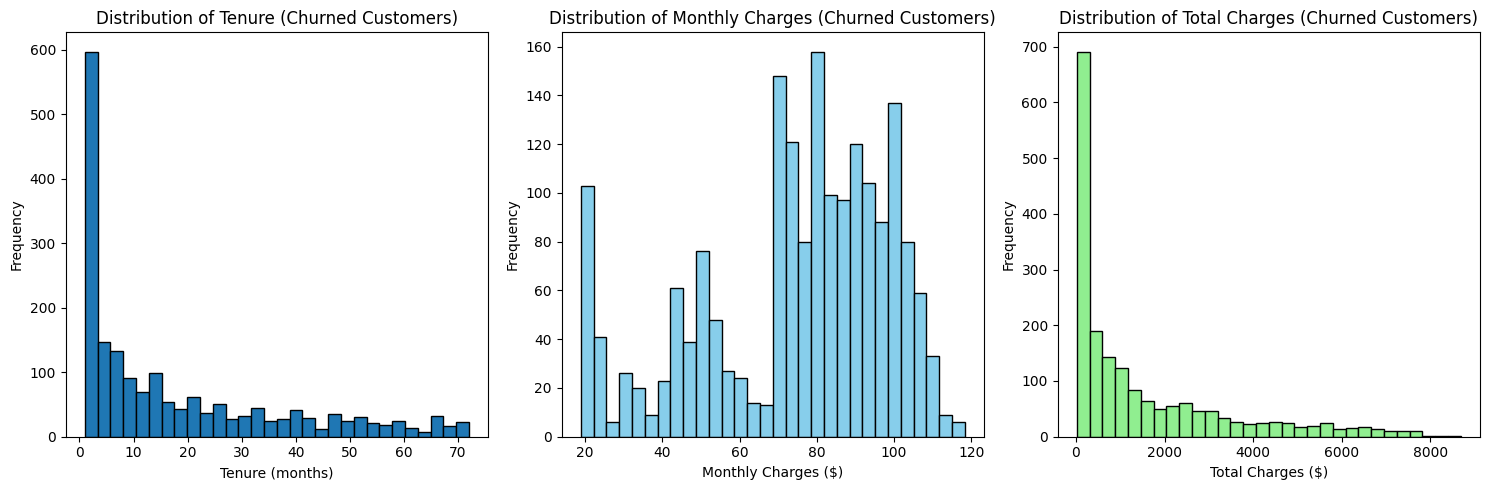

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter the DataFrame to include only customers who churned and create a copy
df_churned = df[df['Churn'] == 'Yes'].copy()

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df_churned['tenure'], bins=30, edgecolor='black')
plt.title('Distribution of Tenure (Churned Customers)')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df_churned['MonthlyCharges'], bins=30, edgecolor='black', color='skyblue')
plt.title('Distribution of Monthly Charges (Churned Customers)')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
# Ensure 'TotalCharges' is numeric and handle potential errors
df_churned['TotalCharges'] = pd.to_numeric(df_churned['TotalCharges'], errors='coerce')
# Drop any rows where TotalCharges became NaN after coercion
df_churned_cleaned = df_churned.dropna(subset=['TotalCharges'])
plt.hist(df_churned_cleaned['TotalCharges'], bins=30, edgecolor='black', color='lightgreen')
plt.title('Distribution of Total Charges (Churned Customers)')
plt.xlabel('Total Charges ($)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Takeaways
* Most customers churn within the first few months
* Customers with higher monthly charges churn at a higher rate
* Customers with less than $500 or so in total charges churn at a much higher rate

## Explore Relationships

Explore relationships between numerical columns using a correlation matrix.

'Correlation Matrix:'

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


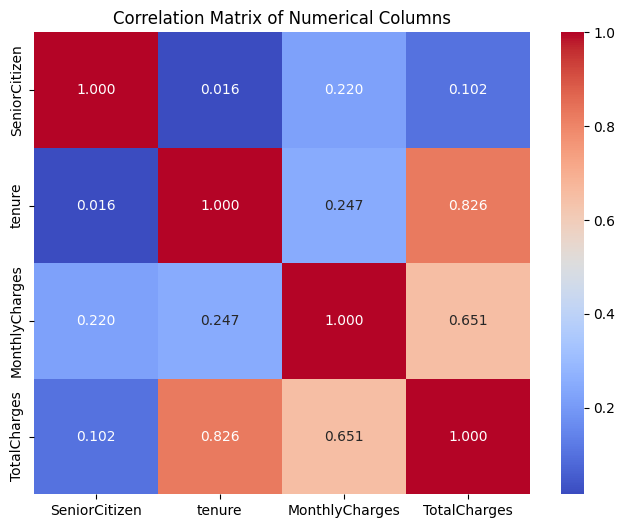

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Display the correlation matrix
display("Correlation Matrix:")
display(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

## Visualize how each demographic relates to Churn

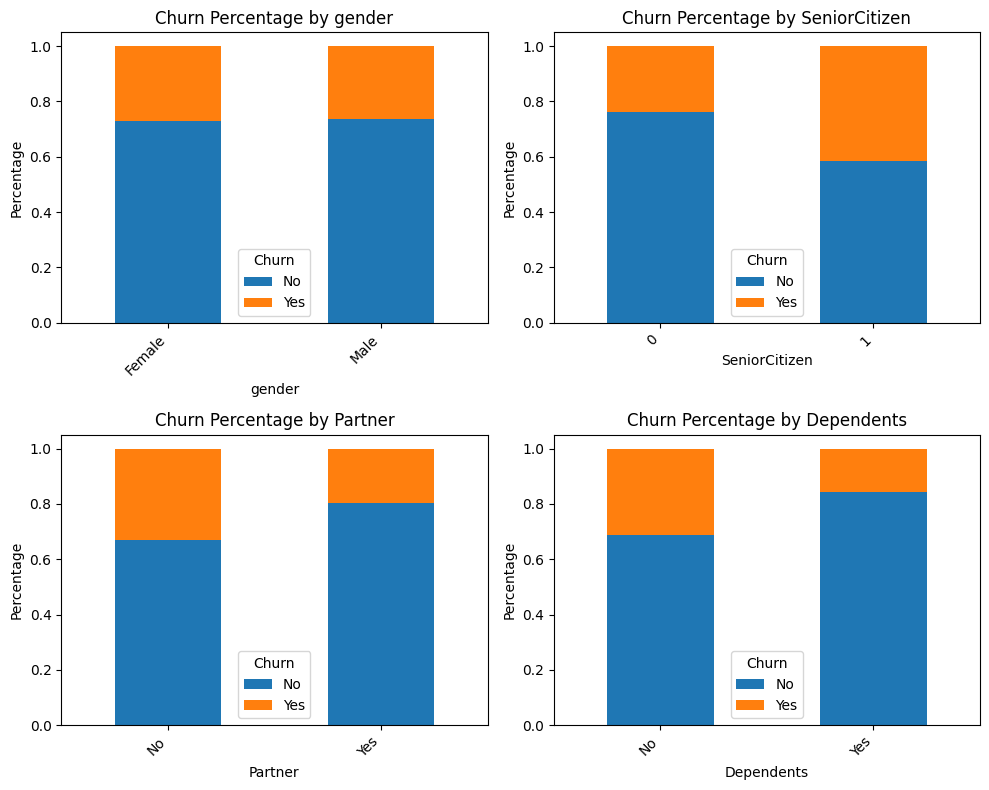

In [17]:
# Percentage of men and women that church
plt.figure(figsize=(10, 8)) # Adjust figure size for better readability

demographic_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

for i, col in enumerate(demographic_features):
    plt.subplot(2, 2, i + 1)
    df.groupby(col)['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f'Churn Percentage by {col}')
    plt.xlabel(col)
    plt.ylabel('Percentage')
    plt.xticks(rotation=45, ha='right') # Rotate labels for better readability


plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

## Takeaways
* Males and females churn at a similar rate
* Senior citizens are nearly 2x more likely to churn
* People without partners are more likely to churn
* People without dependents are about 2x more likely to churn than people with dependents

## Visualize how the rest of the categorical features relate to Churn

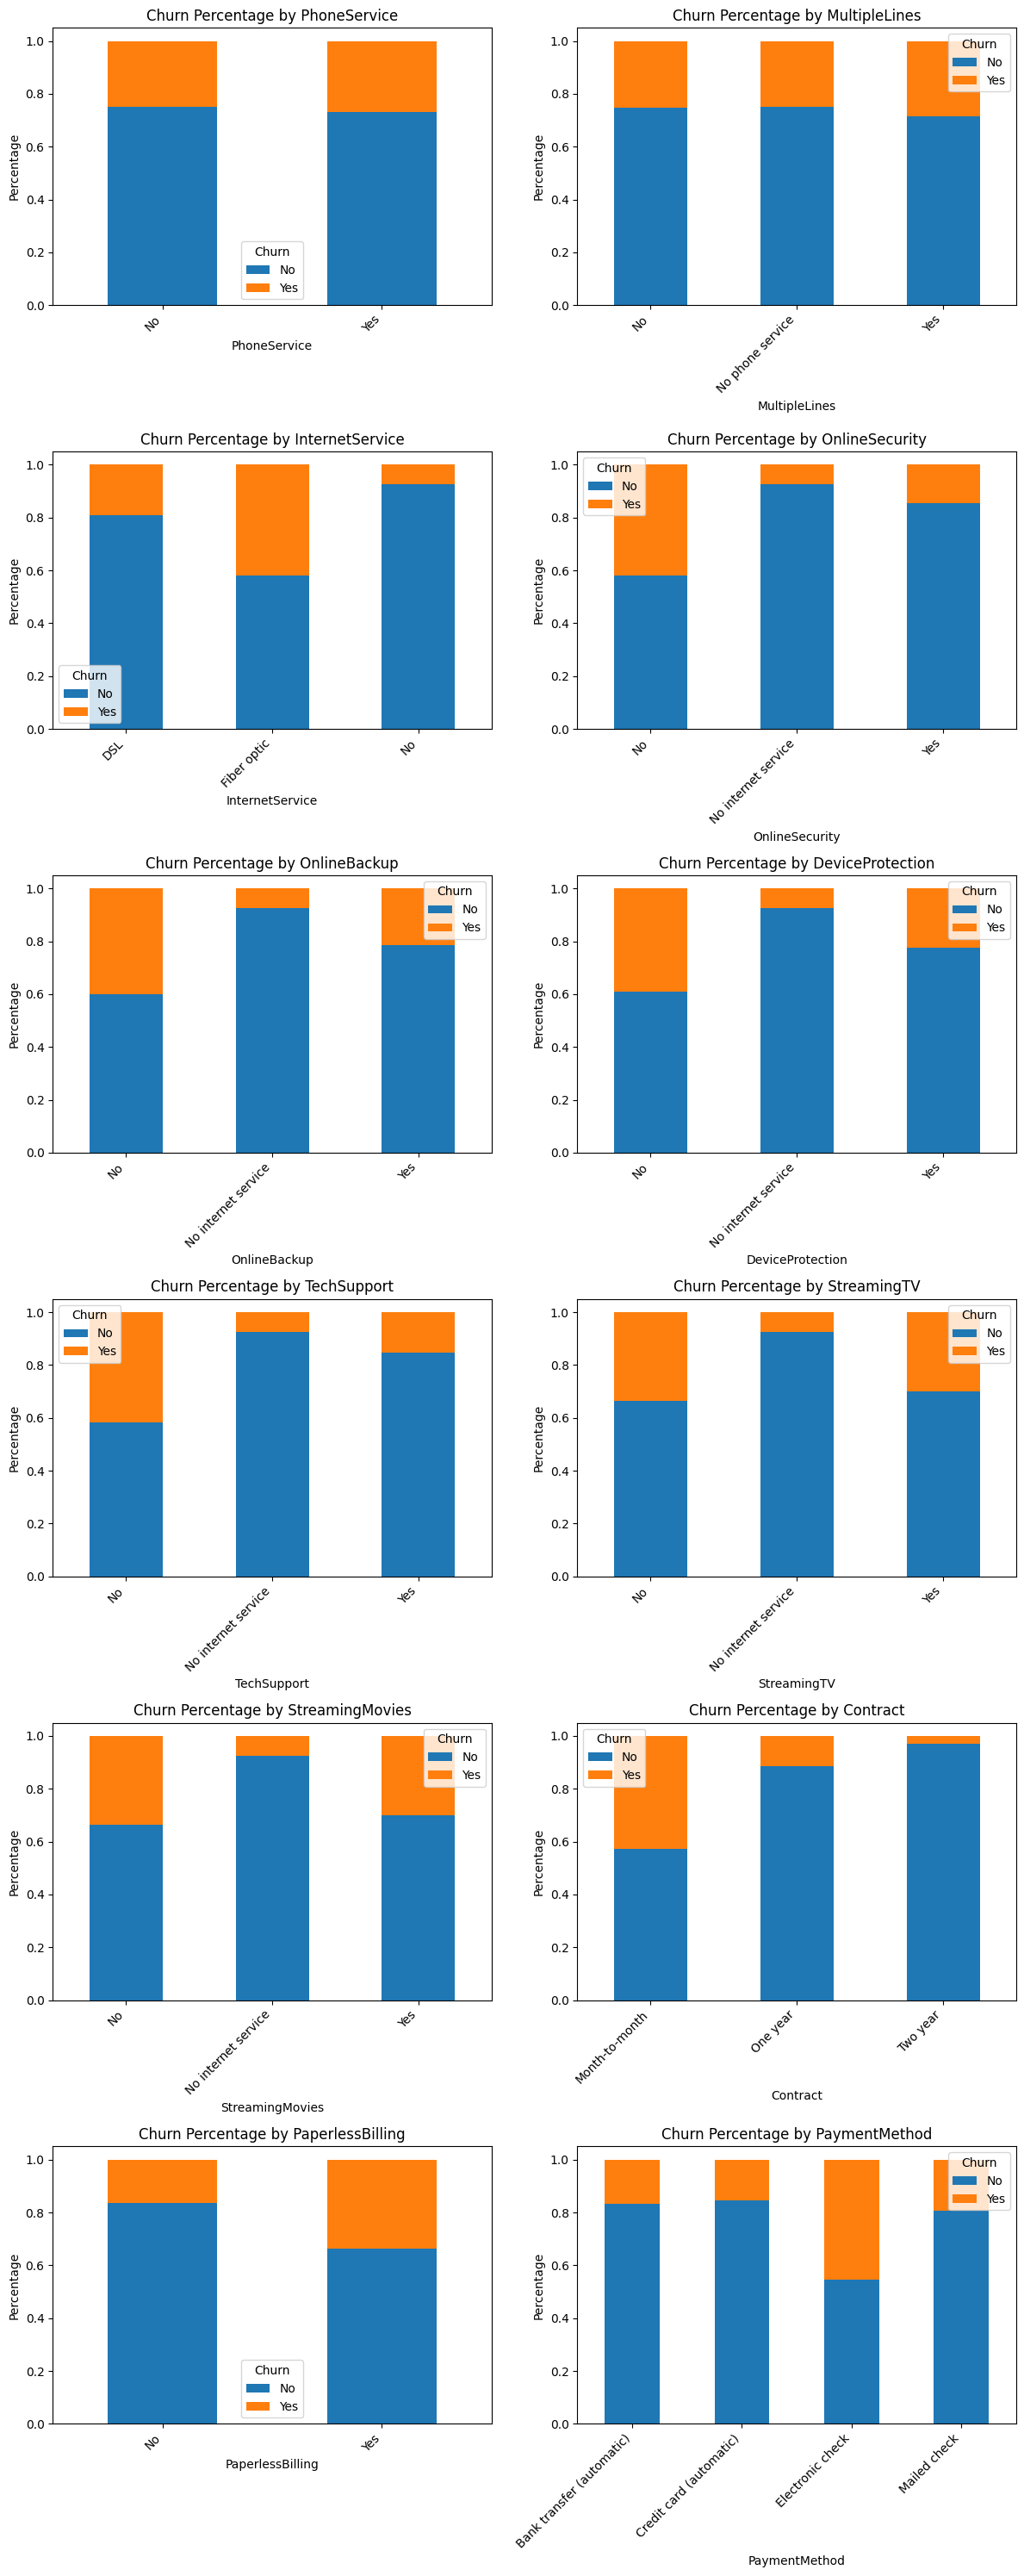

In [18]:
# Get the list of categorical features excluding the ones already plotted
remaining_categorical_features = [
    col for col in df.columns if df[col].dtype == 'object'
    and col not in ['gender', 'Partner', 'Dependents', 'Churn']
]

# Determine the number of rows and columns for the subplots
n_features = len(remaining_categorical_features)
n_cols = 2  # You can adjust the number of columns as needed
n_rows = (n_features + n_cols - 1) // n_cols # Calculate rows needed

plt.figure(figsize=(12, n_rows * 5)) # Adjust figure size based on the number of rows

for i, col in enumerate(remaining_categorical_features):
    plt.subplot(n_rows, n_cols, i + 1)
    df.groupby(col)['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f'Churn Percentage by {col}')
    plt.xlabel(col)
    plt.ylabel('Percentage')
    plt.xticks(rotation=45, ha='right') # Rotate labels for better readability

plt.tight_layout()
plt.show()

## Takeways
* Customers paying through **electronic check** have **higher churn rates**
* Customers subscribing to **Paperless billing** have **higher churn rates**
* Customers paying **month-to-month** have **higher churn rates**
* Customers with **fiber optic** internet service have **higher churn rates**


# (4) Feature Importance

## Determine the most important features in relation to churn by using Mutual Information

* Higher MI = more useful for predicting the target

In [19]:
from sklearn.metrics import mutual_info_score

# Function to compute MI between categorical feature and target
def compute_mi(series):
  return mutual_info_score(series, df['Churn'])

# Categorical vars
categorical_df = df.select_dtypes(include=object).drop('Churn', axis=1)

# Compute MI for each categorical feature
feature_importances = categorical_df.apply(compute_mi).sort_values(ascending=False)

print(feature_importances)

Contract            0.098182
OnlineSecurity      0.064528
TechSupport         0.062873
InternetService     0.055394
OnlineBackup        0.046659
PaymentMethod       0.044423
DeviceProtection    0.043784
StreamingMovies     0.031918
StreamingTV         0.031803
PaperlessBilling    0.019119
Dependents          0.014270
Partner             0.011383
MultipleLines       0.000798
PhoneService        0.000069
gender              0.000037
dtype: float64


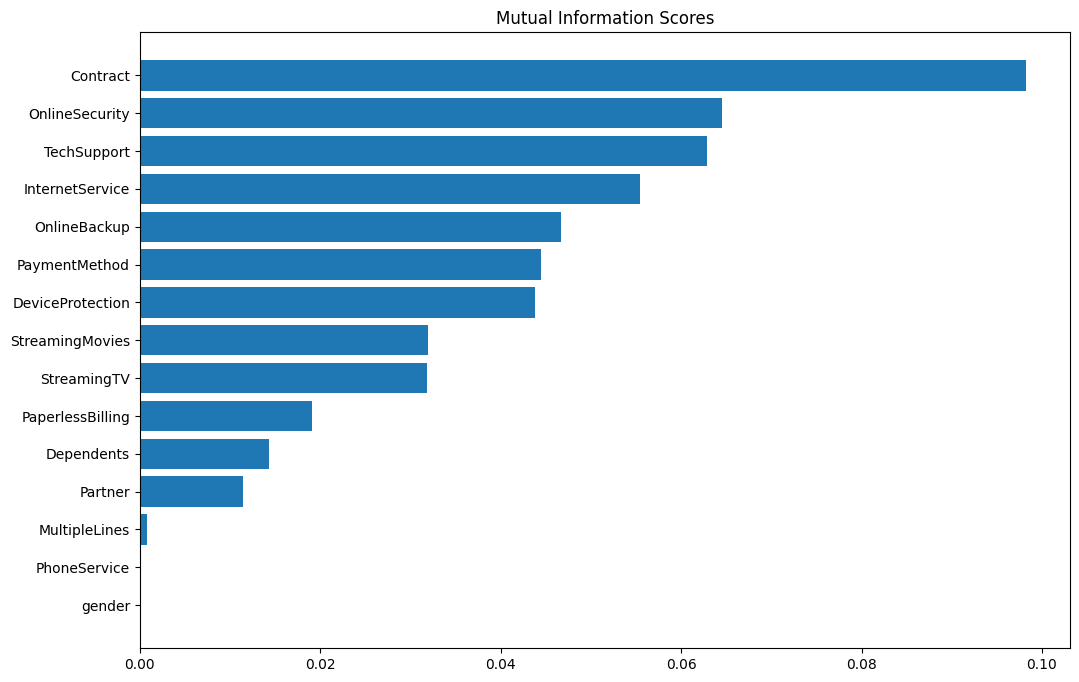

In [20]:
import numpy as np

def plot_mi_scores(scores):
  scores = scores.sort_values(ascending=True)
  width = np.arange(len(scores))
  ticks = list(scores.index)
  plt.barh(width, scores)
  plt.yticks(width, ticks)
  plt.title("Mutual Information Scores")

plt.figure(dpi=100, figsize=(12, 8))
plot_mi_scores(feature_importances)

Takeaways
* `Gender`, `PhoneService` and `MultipleLines` do not seem to have almost any bearing on `Churn`
* Could be removed to simplify the model and remove some risk of confusion

# (5) Feature Engineering

Creating new features based on current features that the model can hopefully learn better from

## Separate X (features) and y (label or target)

In [21]:
# Separate features (X) by dropping the 'Churn' and 'customerID' columns
X = df.drop(['Churn'], axis=1)

# Separate the target variable (y)
y = df['Churn']

# Display the first few rows of X and y to confirm
print("Features (X):")
display(X.head())

print('Target (y):')
display(y.head())

# Display the shapes to confirm
print(f"\nShape of X: {X.shape}")
print("Shape of y:", y.shape)

Features (X):


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


Target (y):


,Churn
0,No
1,No
2,Yes
3,No
4,Yes



Shape of X: (7032, 19)
Shape of y: (7032,)


In [22]:
# Identify categorical columns, excluding 'customerID'
categorical_features = [col for col in X.columns if X[col].dtype == 'object']
numerical_features = [col for col in X.columns if X[col].dtype != 'object' and col != 'SeniorCitizen']

# Select the categorical columns
X_categorical = X[categorical_features]
X_numerical = X[numerical_features]

print(categorical_features)
print(numerical_features)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
['tenure', 'MonthlyCharges', 'TotalCharges']


### Transform X
* Scale numerical features
* Encode categorical features (label for binary, one-hot for more than 2 classes)

In [23]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer # Import SimpleImputer
from sklearn.pipeline import Pipeline # Import Pipeline
import pandas as pd

# Create a pipeline for numerical features: Imputation followed by Scaling
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # Handle missing values
    ('scaler', StandardScaler()) # Scale the features
])

one_hot_features = [
    'Contract',
    'PaymentMethod',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]

label_features = [
    'gender',
    'Partner',
    'Dependents',
    'PaperlessBilling',
    'PhoneService'
]

# Create a ColumnTransformer
# It applies OneHotEncoder to the identified categorical features
# It applies the numerical_transformer pipeline to numerical features
# remainder='passthrough' is not needed if all columns are handled by transformers
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), one_hot_features),
        ('label', OrdinalEncoder(), label_features),
        ('num', numerical_transformer, numerical_features) # Use the numerical pipeline
    ],
    # We don't need remainder='passthrough' if all columns are in either cat or num features
)

# Now, fit and transform X using the updated column_transformer
X_transformed = column_transformer.fit_transform(X)


# Display the categorical and numerical features lists to confirm
print("Categorical Features to be encoded:")
print(categorical_features)
print("\nNumerical Features to be imputed and scaled:")
print(numerical_features)

# The column_transformer is now ready to be used to fit and transform your X data.
# X_transformed now contains the preprocessed data as a NumPy array.

Categorical Features to be encoded:
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

Numerical Features to be imputed and scaled:
['tenure', 'MonthlyCharges', 'TotalCharges']


### Add feature names back to dataframe

In [24]:
import pandas as pd
import numpy as np

# Get the feature names directly from the fitted ColumnTransformer
# This ensures the names are in the correct order matching X_transformed
all_feature_names = column_transformer.get_feature_names_out()

# Create a new DataFrame from the transformed array with the correct column names
# Ensure the index is preserved from the original DataFrame if needed
X_transformed_df = pd.DataFrame(X_transformed, columns=all_feature_names, index=X.index)

# Display the first few rows of the transformed DataFrame
display("Transformed DataFrame (X_transformed_df):")
display(X_transformed_df.head())

# Display the shape of the transformed DataFrame
print("\nShape of the transformed DataFrame:", X_transformed_df.shape)

'Transformed DataFrame (X_transformed_df):'

,cat__Contract_Month-to-month,cat__Contract_One year,cat__Contract_Two year,cat__PaymentMethod_Bank transfer (automatic),cat__PaymentMethod_Credit card (automatic),cat__PaymentMethod_Electronic check,cat__PaymentMethod_Mailed check,cat__MultipleLines_No,cat__MultipleLines_No phone service,cat__MultipleLines_Yes,...,cat__StreamingMovies_No internet service,cat__StreamingMovies_Yes,label__gender,label__Partner,label__Dependents,label__PaperlessBilling,label__PhoneService,num__tenure,num__MonthlyCharges,num__TotalCharges
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.280248,-1.161694,-0.994194
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.064303,-0.260878,-0.173740
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,-1.239504,-0.363923,-0.959649
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.512486,-0.747850,-0.195248
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-1.239504,0.196178,-0.940457



Shape of the transformed DataFrame: (7032, 39)


In [25]:
# Create a dictionary to map old column names to new column names
new_column_names = {}
for col in X_transformed_df.columns:
    # Check for and remove 'cat__' prefix
    if col.startswith('cat__'):
        new_column_names[col] = col.replace('cat__', '')
    # Check for and remove 'remainder__' prefix
    elif col.startswith('label__'):
        new_column_names[col] = col.replace('label__', '')
    elif col.startswith('num__'):
        new_column_names[col] = col.replace('num__', '')
    else:
        # Keep column name as is if no prefix is found (unlikely with ColumnTransformer output)
        new_column_names[col] = col

# Rename the columns in the DataFrame
X_transformed_df.rename(columns=new_column_names, inplace=True)

# Display the first few rows with the updated column names
display("DataFrame with prefixes removed from column names:")
display(X_transformed_df.head())

'DataFrame with prefixes removed from column names:'

,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_No internet service,StreamingMovies_Yes,gender,Partner,Dependents,PaperlessBilling,PhoneService,tenure,MonthlyCharges,TotalCharges
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.280248,-1.161694,-0.994194
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.064303,-0.260878,-0.173740
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,-1.239504,-0.363923,-0.959649
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.512486,-0.747850,-0.195248
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-1.239504,0.196178,-0.940457


In [26]:
# Checking the standardization. Seems to have worked
X_transformed_df[numerical_features].describe()

,tenure,MonthlyCharges,TotalCharges
count,7.032000e+03,7.032000e+03,7.032000e+03
mean,-1.126643e-16,6.062651e-17,-1.119064e-16
std,1.000071e+00,1.000071e+00,1.000071e+00
min,-1.280248e+00,-1.547283e+00,-9.990692e-01
25%,-9.542963e-01,-9.709769e-01,-8.302488e-01
50%,-1.394171e-01,1.845440e-01,-3.908151e-01
75%,9.199259e-01,8.331482e-01,6.668271e-01
max,1.612573e+00,1.793381e+00,2.824261e+00


In [27]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_encoded = label_encoder.fit_transform(y)

# Display the first few encoded values to confirm
display("Encoded Target Variable (y_encoded):")
display(y_encoded[:10])

# Display the classes found by the encoder (to see the mapping)
print("\nClasses and their encoded values:", label_encoder.classes_)

'Encoded Target Variable (y_encoded):'

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 0])


Classes and their encoded values: ['No' 'Yes']


In [28]:
display(X_transformed_df.shape)
display(y_encoded.shape)

(7032, 39)

(7032,)

## Mutual Information

Revisited with new columns

In [29]:
from sklearn.feature_selection import mutual_info_classif

discrete_features = X_transformed_df.dtypes == int

def make_mi_scores(X, y, discrete_features):
  mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
  mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
  mi_scores = mi_scores.sort_values(ascending=False)
  return mi_scores

mi_scores = make_mi_scores(X_transformed_df, y_encoded, discrete_features=False)
mi_scores[::]

,MI Scores
Contract_Month-to-month,0.089152
tenure,0.081549
Contract_Two year,0.065351
TechSupport_No,0.060324
OnlineSecurity_No,0.058980
InternetService_Fiber optic,0.053502
MonthlyCharges,0.049885
InternetService_No,0.044653
TotalCharges,0.043744
PaymentMethod_Electronic check,0.041297


### Plot MI Scores

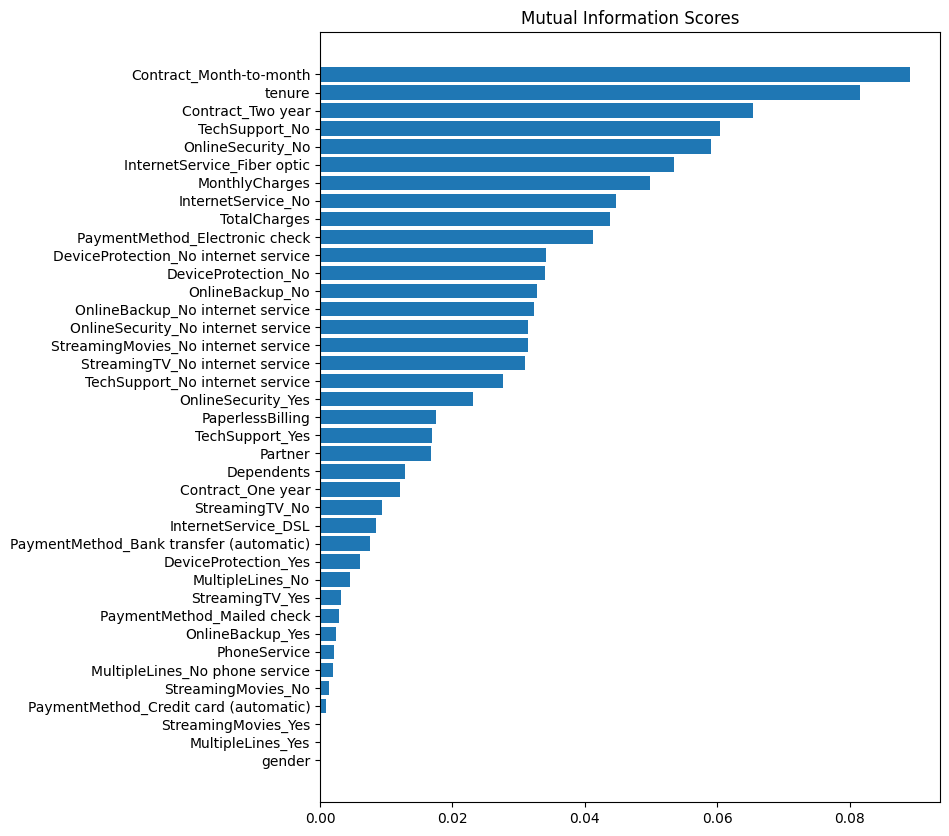

In [30]:
def plot_mi_scores(scores):
  scores = scores.sort_values(ascending=True)
  width = np.arange(len(scores))
  ticks = list(scores.index)
  plt.barh(width, scores)
  plt.yticks(width, ticks)
  plt.title("Mutual Information Scores")

plt.figure(dpi=100, figsize=(8, 10))
plot_mi_scores(mi_scores)

# (6) Split into training and testing sets

Dataframe names at this point:
* `X_transformed_df`
* `y_series`

In [31]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed_df, y_encoded, test_size=0.25, random_state=42, shuffle=True)

display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(5274, 39)

(1758, 39)

(5274,)

(1758,)

# (7) Begin testing algorithms

Algo's we will test
* Baseline (predict most common class for every instance)
* Logistic Regression
* K Nearest Neighbours
* Support Vector Machines
* Decision Tree
* Random Forest
* Gradient Boosting

In [35]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

def create_models():
  random_seed = 42
  models = []
  models.append(('dummy_classifier', DummyClassifier(random_state=random_seed, strategy='most_frequent')))
  models.append(('logistic_regression', LogisticRegression(random_state=random_seed)))
  models.append(('k_nearest_neighbors', KNeighborsClassifier()))
  models.append(('support_vector_machine', SVC(random_state=random_seed)))
  models.append(('decision_tree', DecisionTreeClassifier(random_state=random_seed)))
  models.append(('random_forest', RandomForestClassifier(random_state=random_seed)))
  models.append(('gradient_boosting', GradientBoostingClassifier(random_state=random_seed)))
  models.append(('xgboost', XGBClassifier(random_state=random_seed)))

  return models

models = create_models()


In [36]:
print(models)

[('dummy_classifier', DummyClassifier(random_state=42, strategy='most_frequent')), ('logistic_regression', LogisticRegression(random_state=42)), ('k_nearest_neighbors', KNeighborsClassifier()), ('support_vector_machine', SVC(random_state=42)), ('decision_tree', DecisionTreeClassifier(random_state=42)), ('random_forest', RandomForestClassifier(random_state=42)), ('gradient_boosting', GradientBoostingClassifier(random_state=42)), ('xgboost', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
    

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

results = []
names = []
scoring = 'accuracy'

for name, model in models:
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  accuracy = accuracy_score(y_test, predictions)
  precision = precision_score(y_test, predictions)
  recall = recall_score(y_test, predictions)
  results.append(accuracy)
  names.append(name)
  print(f'Classifier: {name}, Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}')

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classifier: dummy_classifier, Accuracy: 0.739, Precision: 0.000, Recall: 0.000
Classifier: logistic_regression, Accuracy: 0.792, Precision: 0.620, Recall: 0.520
Classifier: k_nearest_neighbors, Accuracy: 0.760, Precision: 0.542, Recall: 0.511
Classifier: support_vector_machine, Accuracy: 0.794, Precision: 0.643, Recall: 0.467
Classifier: decision_tree, Accuracy: 0.719, Precision: 0.462, Recall: 0.480
Classifier: random_forest, Accuracy: 0.783, Precision: 0.607, Recall: 0.476
Classifier: gradient_boosting, Accuracy: 0.792, Precision: 0.627, Recall: 0.496
Classifier: xgboost, Accuracy: 0.773, Precision: 0.573, Recall: 0.507


Takeaways:
* **gradient boosting** had best default accuracy @ ~80%
* **random forest**, **SVM**, and **logistic regression** were all close in terms of accuracy
* **SVM** actually had the highest precision @ ~64%
* **Logistic Regression** had the highest recall @ 52%

In the case of telecom churn, where the cost of gaining a new customer is significantly higher than retaining a customer, we would like to **maximize our recall** even if the precision falls a bit.

Having a high recall should hopefully allow us to identify the maximum number of customers that are at risk of churning even if that means we also identify some customers that are not at risk

# (8) Address the imbalance between Churn and No Churn

This training set is quite imbalanced which means that training on accuracy isn't all that good. The two target classes are split at a near 75-25 split which means a model could choose the more common class 100% of the time and still seem like it fit the data pretty well when common sense tells us the opposite.

In [42]:
print(pd.Series(y_train).value_counts())

0    3863
1    1411
Name: count, dtype: int64


## Imbalance handling techniques

Techniques for Handling Imbalanced Data:
1. Oversampling: Increasing the number of instances in the minority class to balance the class distribution.
   Example: SMOTE (Synthetic Minority Over-sampling Technique) generates synthetic samples for the minority class.

2. Undersampling: Decreasing the number of instances in the majority class to balance the class distribution.
   Example: Random Undersampling randomly removes instances from the majority class.

I will use the SMOTE technique to balance the training set so that our models can actually learn to distinguish the classes.

In [43]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train, y_train = smote.fit_resample(X_train, y_train)

# Display the shape of the resampled data
display("Shape of resampled training data:")
display(X_train.shape)
display(y_train.shape)

# Display the value counts of the resampled target variable
display("Value counts of resampled target variable:")
display(pd.Series(y_train).value_counts())

'Shape of resampled training data:'

(7726, 39)

(7726,)

'Value counts of resampled target variable:'

,count
0,3863
1,3863


As we can see, this worked as intented and now our training data has equal instances of churn and not churn

# (9) Test Base Models with Balanced Dataset

In [44]:
results = []
names = []
scoring = 'accuracy'

for name, model in models:
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  accuracy = accuracy_score(y_test, predictions)
  precision = precision_score(y_test, predictions)
  recall = recall_score(y_test, predictions)
  results.append(accuracy)
  names.append(name)
  print(f'Classifier: {name}, Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}')

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classifier: dummy_classifier, Accuracy: 0.739, Precision: 0.000, Recall: 0.000
Classifier: logistic_regression, Accuracy: 0.746, Precision: 0.508, Recall: 0.790
Classifier: k_nearest_neighbors, Accuracy: 0.695, Precision: 0.447, Recall: 0.725
Classifier: support_vector_machine, Accuracy: 0.753, Precision: 0.518, Recall: 0.738
Classifier: decision_tree, Accuracy: 0.734, Precision: 0.491, Recall: 0.541
Classifier: random_forest, Accuracy: 0.776, Precision: 0.571, Recall: 0.561
Classifier: gradient_boosting, Accuracy: 0.772, Precision: 0.550, Recall: 0.679
Classifier: xgboost, Accuracy: 0.775, Precision: 0.567, Recall: 0.574


## Comparison

### Unbalanced Performance
* Classifier: dummy_classifier, Accuracy: 0.739, Precision: 0.000, Recall: 0.000
* Classifier: logistic_regression, Accuracy: 0.792, Precision: 0.620, Recall: 0.520
* Classifier: k_nearest_neighbors, Accuracy: 0.760, Precision: 0.542, Recall: 0.511
* Classifier: support_vector_machine, Accuracy: 0.794, Precision: 0.643, Recall: 0.467
* Classifier: decision_tree, Accuracy: 0.719, Precision: 0.462, Recall: 0.480
* Classifier: random_forest, Accuracy: 0.783, Precision: 0.607, Recall: 0.476
* Classifier: gradient_boosting, Accuracy: 0.792, Precision: 0.627, Recall: 0.496
* Classifier: xgboost, Accuracy: 0.773, Precision: 0.573, Recall: 0.507

### Balanced Performance
* Classifier: dummy_classifier, Accuracy: 0.739, Precision: 0.000, Recall: 0.000
* Classifier: logistic_regression, Accuracy: 0.746, Precision: 0.508, Recall: 0.790
* Classifier: k_nearest_neighbors, Accuracy: 0.695, Precision: 0.447, Recall: 0.725
* Classifier: support_vector_machine, Accuracy: 0.753, Precision: 0.518, Recall: 0.738
* Classifier: decision_tree, Accuracy: 0.734, Precision: 0.491, Recall: 0.541
* Classifier: random_forest, Accuracy: 0.776, Precision: 0.571, Recall: 0.561
* Classifier: gradient_boosting, Accuracy: 0.772, Precision: 0.550, Recall: 0.679
* Classifier: xgboost, Accuracy: 0.775, Precision: 0.567, Recall: 0.574

Takeaways:
* On most models, the **accuracy** and **precision decreased**
* However, the **recall increased**, sometimes significantly

That clues me in that the models were not learning well and for most models they were only accurately predicting churn about 50% of the time which is not what we want.

The models trained on the balanced model, while being elss accurate overall, are predicted churn correctly nearly 80% of the time on some models but every one was significantly better than the unbalanced models

# (10) Keep Evaluating Gradient Boosting

Later I will play around with hyperparameters on the other Machine Learning models, but for now I will stick with gradient boosting since it had the highest accuracy by default.

Important hyperparamers for **GradientBoostingClassifier**
* `loss` : loss function to be minimized (default='log_loss')
* `learning_rate` : step size at each iteration (0.1)
* `n_estimators` : num boosting stages to be run (100)
* `max_depth` : max depth of individual regression estimators (3)
* `max_features` : num features to consider when looking for best split (None)
* `min_samples_split` : min num samples required to split internal node (2)


# (11) Hyperparameter Tuning

Split training data into train and test set for hyperparameter tuning.

One option for this is **k-fold cross-validation**

We can do this with:
* **grid search** - tests all combos and is time consuming and cpu intensive
* **random search** - random combos of parameter options are tested. May not get optimal solution but more efficent

In [47]:
from sklearn.model_selection import RandomizedSearchCV

# Create dictionary holding params we want to try
params = {
    'n_estimators': [80,90,100,110,120],
    'max_depth': [2,3,4,5],
    'learning_rate': [0.001,0.01,0.1],
    'max_features': [None, 'sqrt', 'log2'],
    'min_samples_split': [2,3,4]
}

random_search_clf = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                                       param_distributions=params,
                                       cv=5,
                                       n_iter=150,
                                       n_jobs=-1)

random_search_clf.fit(X_train, y_train)

print("Best parameters found by RandomizedSearchCV:")
display(random_search_clf.best_params_)

Best parameters found by RandomizedSearchCV:


{'n_estimators': 100,
 'min_samples_split': 4,
 'max_features': 'sqrt',
 'max_depth': 5,
 'learning_rate': 0.1}

In [55]:
# Create dictionary holding params we want to try
params = {
    'n_estimators': [80,90,100,110,120],
    'max_depth': [2,3,4,5],
    'learning_rate': [0.001,0.01,0.1],
    'max_features': [None, 'sqrt', 'log2'],
    'min_samples_split': [2,3,4]
}

random_search_clf_recall = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                                       param_distributions=params,
                                       cv=5,
                                       n_iter=150,
                                       n_jobs=-1,
                                       scoring='recall')

random_search_clf_recall.fit(X_train, y_train)

print("Best parameters found by RandomizedSearchCV:")
display(random_search_clf_recall.best_params_)

Best parameters found by RandomizedSearchCV:


{'n_estimators': 80,
 'min_samples_split': 3,
 'max_features': None,
 'max_depth': 3,
 'learning_rate': 0.01}

# (12) Check performance of model with various metrics

## Create function to allow evaluation of model

Includes:
* Accuracy
* Precision
* Recall
* F1-score
* ROC-AUC
* Confusion Matrix

Sklearn also has a built-in `classification-report`
Includes:
* Precision
* Recall
* F1-score
* Support (# of sample achieved for each class)

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
def evaluate_model(y_test, y_pred):
  # Calculate common classification metrics
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  # roc_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1]) # Get probabilities for ROC AUC

  # Calculate the confusion matrix
  conf_matrix = confusion_matrix(y_test, y_pred)

  # Display the evaluation metrics
  print(f"Accuracy: {accuracy:.4f}")
  print(f"Precision: {precision:.4f}")
  print(f"Recall: {recall:.4f}")
  print(f"F1-Score: {f1:.4f}")
  # print(f"ROC AUC: {roc_auc:.4f}")

  # Display the confusion matrix
  display("Confusion Matrix:")
  display(conf_matrix)


In [54]:
# Predictions
random_search_preds = random_search_clf.predict(X_test)

# Evaluate the model
evaluate_model(y_test, random_search_preds)

Accuracy: 0.7770
Precision: 0.5618
Recall: 0.6550
F1-Score: 0.6048


'Confusion Matrix:'

array([[1066,  234],
       [ 158,  300]])

In [56]:
random_search_recall_preds = random_search_clf_recall.predict(X_test)

evaluate_model(y_test, random_search_recall_preds)

Accuracy: 0.7218
Precision: 0.4802
Recall: 0.8210
F1-Score: 0.6060


'Confusion Matrix:'

array([[893, 407],
       [ 82, 376]])

In [57]:
from sklearn.metrics import classification_report

print(classification_report(y_test, random_search_preds))
print(classification_report(y_test, random_search_recall_preds))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1300
           1       0.56      0.66      0.60       458

    accuracy                           0.78      1758
   macro avg       0.72      0.74      0.72      1758
weighted avg       0.79      0.78      0.78      1758

              precision    recall  f1-score   support

           0       0.92      0.69      0.79      1300
           1       0.48      0.82      0.61       458

    accuracy                           0.72      1758
   macro avg       0.70      0.75      0.70      1758
weighted avg       0.80      0.72      0.74      1758



Importance of Appropriate Evaluation Metrics:
When dealing with imbalanced datasets, relying solely on accuracy can be misleading. A model might achieve high accuracy by simply predicting the majority class for all instances. More informative metrics include:
- Precision: The proportion of correctly predicted positive instances among all instances predicted as positive. Useful when the cost of a false positive is high.
- Recall (Sensitivity): The proportion of correctly predicted positive instances among all actual positive instances. Useful when the cost of a false negative is high (e.g., missing a fraudulent transaction or a disease).
- F1-Score: The harmonic mean of precision and recall, providing a balanced measure of the model's performance.
- ROC AUC (Receiver Operating Characteristic Area Under the Curve): Measures the ability of a classifier to distinguish between classes. A higher AUC indicates better performance.


# (13) Other Experiments with Models

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

lr_model.fit(X_train, y_train)

LogisticRegression()

## Make Predictions

### Subtask:
Use the trained Logistic Regression model to make predictions on the test set.

In [ ]:
# Assuming lr_model is your trained Logistic Regression model
# Assuming X_test is your test features DataFrame

# Make predictions on the test set
lr_pred = lr_model.predict(X_test)

# Display the first few predictions
display("First 10 predictions:")
display(lr_pred[:10])

'First 10 predictions:'

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
display(y_test[:10])

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 1])

## Train and evaluate model with balanced data

### Subtask:
Train the Logistic Regression model (or another model) on the balanced training data and evaluate its performance, comparing metrics to the previous model trained on imbalanced data.


**Reasoning**:
Train a new Logistic Regression model on the resampled training data, make predictions on the test set, and evaluate its performance using the provided function to compare against the previous model's results.



In [ ]:
# Instantiate a new Logistic Regression model
lr_model_balanced = LogisticRegression(max_iter=1000) # Increase max_iter for convergence

# Train the new Logistic Regression model on the resampled training data
lr_model_balanced.fit(X_train, y_train)

# Use the trained model to make predictions on the original, imbalanced test set
lr_pred_balanced = lr_model_balanced.predict(X_test)

# Evaluate the performance of the model trained on balanced data
display("Evaluation of Logistic Regression Model trained on Balanced Data:")
evaluate_model(y_test, lr_pred_balanced)

'Evaluation of Logistic Regression Model trained on Balanced Data:'

Accuracy: 0.7558
Precision: 0.5337
Recall: 0.8100
F1-Score: 0.6434
ROC AUC: 0.8602


'Confusion Matrix:'

array([[943, 339],
       [ 91, 388]])

## Summary:

### Data Analysis Key Findings

*   The initial training data exhibits significant class imbalance, with the "No Churn" class having 3892 instances and the "Churn" class having 1390 instances, a ratio of nearly 3:1.
*   Applying the SMOTE oversampling technique successfully balanced the training data, resulting in 3892 instances for both the "No Churn" and "Churn" classes in the resampled dataset.
*   Training a Logistic Regression model on the balanced data and evaluating it on the original, imbalanced test set yielded the following metrics: Accuracy: 0.7558, Precision: 0.5337, Recall: 0.8100, F1-Score: 0.6434, and ROC AUC: 0.8602.

### Insights or Next Steps

*   The balanced model shows a significantly improved Recall (0.8100) compared to what would typically be expected from a model trained on imbalanced data, indicating better identification of the minority "Churn" class.
*   While Recall improved, Precision (0.5337) is still moderate. Further steps could involve tuning the model hyperparameters or exploring alternative classification algorithms and resampling techniques to potentially improve the trade-off between Precision and Recall.


Balancing the data decreased the accuracy by 6 points, decreased the precision by 15 points, increased the recall by 23 points, kept the F1 and ROC-AUC scores the same.

This indicated that our balanced dataset made it where our model could prioritize minimizing false negatives.

I think in the area of customer churn, this is a good trade-off because we should be focusing on identifying as many potential customers that will leave as possible even if we identify some that will not leave

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

distributions = {'C': uniform(loc=0, scale=4)}
clf = RandomizedSearchCV(lr_model, distributions, random_state=0, scoring='recall', cv=5, n_iter=10)
search = clf.fit(X_train_resampled, y_train_resampled)

In [ ]:
search.best_params_

{'C': np.float64(1.6946191973556188)}

In [ ]:
GridSearchLR = search.best_estimator_

In [ ]:
# Train the new Logistic Regression model on the resampled training data
GridSearchLR.fit(X_train_resampled, y_train_resampled)

# Use the trained model to make predictions on the original, imbalanced test set
lr_pred_balanced = GridSearchLR.predict(X_test)

# Evaluate the performance of the model trained on balanced data
display("Evaluation of Logistic Regression Model trained on Balanced Data:")
evaluate_model(y_test, lr_pred_balanced)

'Evaluation of Logistic Regression Model trained on Balanced Data:'

Accuracy: 0.7570
Precision: 0.5353
Recall: 0.8079
F1-Score: 0.6439
ROC AUC: 0.8602


'Confusion Matrix:'

array([[946, 336],
       [ 92, 387]])

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train_resampled, y_train_resampled)

tree_pred = tree_clf.predict(X_test)

display("Evaluation of Decision Tree Model trained on Balanced Data:")
evaluate_model(y_test, tree_pred)


'Evaluation of Decision Tree Model trained on Balanced Data:'

Accuracy: 0.7286
Precision: 0.5009
Recall: 0.5553
F1-Score: 0.5267
ROC AUC: 0.8602


'Confusion Matrix:'

array([[1017,  265],
       [ 213,  266]])

In [ ]:
from sklearn.model_selection import RandomizedSearchCV # Changed from GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint, uniform # Import distributions

# Initialize a Decision Tree Classifier model
tree_clf = DecisionTreeClassifier(random_state=42) # Set random_state for reproducibility

# Define the parameter distributions to sample from (Changed from param_grid)
param_distributions = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': randint(5, 21), # Example: random integers between 5 and 20
    'min_samples_split': randint(2, 21), # Example: random integers between 2 and 20
    'min_samples_leaf': randint(1, 11),   # Example: random integers between 1 and 10
    'max_features': [None, 'sqrt', 'log2', 0.5, 0.8] # Still can use a list for categorical-like parameters
}

# Set up RandomizedSearchCV
# estimator: the model to tune
# param_distributions: the dictionary of parameter distributions to sample from (Changed from param_grid)
# scoring: the metric to optimize ('recall' is often relevant for churn)
# cv: number of cross-validation folds
# n_iter: number of parameter settings that are sampled (e.g., 50, adjust based on computational budget)
# random_state: for reproducibility
# n_jobs: number of CPU cores to use (-1 means all available)
# verbose: controls the verbosity: higher values provide more detail
random_search = RandomizedSearchCV(tree_clf, param_distributions=param_distributions,
                                   scoring='recall', cv=5, n_jobs=-1, verbose=2,
                                   n_iter=50, random_state=42) # Added n_iter and random_state

# Fit the randomized search to the resampled training data
# This will train multiple models for each parameter combination
random_search.fit(X_train_resampled, y_train_resampled)

# Display the best parameters found by RandomizedSearchCV
print("Best parameters found by RandomizedSearchCV:")
display(random_search.best_params_)

# You can also access the best model directly: random_search.best_estimator_
# And the best score achieved: random_search.best_score_

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found by RandomizedSearchCV:


{'criterion': 'entropy',
 'max_depth': 12,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'splitter': 'best'}

In [ ]:
display(random_search.best_score_)

np.float64(0.8050387584108556)

In [ ]:
best_tree_clf = random_search.best_estimator_
tree_preds = best_tree_clf.predict(X_test)
evaluate_model(y_test, tree_preds)

Accuracy: 0.7428
Precision: 0.5207
Recall: 0.6827
F1-Score: 0.5908
ROC AUC: 0.8602


'Confusion Matrix:'

array([[981, 301],
       [152, 327]])

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_resampled, y_train_resampled)

rf_preds = rf_clf.predict(X_test)

evaluate_model(y_test, rf_preds)

Accuracy: 0.7774
Precision: 0.5995
Recall: 0.5470
F1-Score: 0.5721
ROC AUC: 0.8602


'Confusion Matrix:'

array([[1107,  175],
       [ 217,  262]])

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=200,random_state=42)
rf_clf.fit(X_train_resampled, y_train_resampled)

rf_preds = rf_clf.predict(X_test)

evaluate_model(y_test, rf_preds)

Accuracy: 0.7808
Precision: 0.6069
Recall: 0.5511
F1-Score: 0.5777
ROC AUC: 0.8602


'Confusion Matrix:'

array([[1111,  171],
       [ 215,  264]])

In [ ]:
rf_clf = RandomForestClassifier(criterion='entropy',n_estimators=100,random_state=42)
rf_clf.fit(X_train_resampled, y_train_resampled)

rf_preds = rf_clf.predict(X_test)

evaluate_model(y_test, rf_preds)

Accuracy: 0.7865
Precision: 0.6195
Recall: 0.5574
F1-Score: 0.5868
ROC AUC: 0.8602


'Confusion Matrix:'

array([[1118,  164],
       [ 212,  267]])

In [ ]:
from scipy.stats import randint, uniform

# Initialize a Random Forest Classifier model
rf_clf = RandomForestClassifier(random_state=42) # Set random_state for reproducibility

# Define the parameter distributions to sample from
param_distributions = {
    'n_estimators': randint(100, 500), # Number of trees in the forest
    'criterion': ['gini', 'entropy'], # Function to measure the quality of a split
    'max_depth': randint(5, 31), # Maximum depth of the tree (or None)
    'min_samples_split': randint(2, 21), # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 11),   # Minimum number of samples required to be at a leaf node
}

# Set up RandomizedSearchCV
# estimator: the model to tune
# param_distributions: the dictionary of parameter distributions to sample from
# scoring: the metric to optimize ('recall' is relevant for churn)
# cv: number of cross-validation folds
# n_iter: number of parameter settings that are sampled (e.g., 100 or more for Random Forest)
# random_state: for reproducibility
# n_jobs: number of CPU cores to use (-1 means all available)
# verbose: controls the verbosity
random_search_rf = RandomizedSearchCV(rf_clf, param_distributions=param_distributions,
                                      scoring='recall', cv=5, n_jobs=-1, verbose=2,
                                      n_iter=20, random_state=42) # Increased n_iter as Random Forests have more parameters

# Fit the randomized search to the resampled training data
# This will train multiple models for each parameter combination
random_search_rf.fit(X_train_resampled, y_train_resampled)

# Display the best parameters found by RandomizedSearchCV
print("Best parameters found by RandomizedSearchCV for Random Forest:")
display(random_search_rf.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found by RandomizedSearchCV for Random Forest:


{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 413}

In [ ]:
# You can access the best model directly: random_search_rf.best_estimator_
# And the best score achieved: random_search_rf.best_score_
best_rf_clf = random_search_rf.best_estimator_
rf_preds = best_rf_clf.predict(X_test)
evaluate_model(y_test, rf_preds)

Accuracy: 0.7825
Precision: 0.5808
Recall: 0.7203
F1-Score: 0.6431
ROC AUC: 0.8602


'Confusion Matrix:'

array([[1033,  249],
       [ 134,  345]])

## Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train_resampled, y_train_resampled)

svm_preds = svm_clf.predict(X_test)

evaluate_model(y_test, svm_preds)

Accuracy: 0.7717
Precision: 0.5586
Recall: 0.7662
F1-Score: 0.6461
ROC AUC: 0.8602


'Confusion Matrix:'

array([[992, 290],
       [112, 367]])

In [ ]:
from scipy.stats import reciprocal

svm_clf = SVC(random_state=42)

param_distributions = {
    "C": reciprocal(20, 200000),
    "kernel": ["linear", "rbf", "poly"],
    "degree": [2, 3]
}

random_search_svm_clf = RandomizedSearchCV(svm_clf, param_distributions=param_distributions,
                                      scoring='recall', n_jobs=-1, verbose=2,
                                      n_iter=1, random_state=42)

random_search_svm_clf.fit(X_train_resampled, y_train_resampled)

# Display the best parameters found by RandomizedSearchCV
print("Best parameters found by RandomizedSearchCV for SVC:")
display(random_search_svm_clf.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters found by RandomizedSearchCV for SVC:


{'C': np.float64(629.7823295913721), 'degree': 2, 'kernel': 'poly'}

In [ ]:
best_svm_clf = random_search_svm_clf.best_estimator_
svm_preds = best_svm_clf.predict(X_test)
evaluate_model(y_test, svm_preds)

Accuracy: 0.7984
Precision: 0.6235
Recall: 0.6534
F1-Score: 0.6381
ROC AUC: 0.8602


'Confusion Matrix:'

array([[1093,  189],
       [ 166,  313]])

## Linear SVM

In [ ]:
from sklearn.svm import LinearSVC

lin_svm_clf = LinearSVC(random_state=42)
lin_svm_clf.fit(X_train_resampled, y_train_resampled)

lin_svm_preds = lin_svm_clf.predict(X_test)

evaluate_model(y_test, lin_svm_preds)

Accuracy: 0.7553
Precision: 0.5325
Recall: 0.8205
F1-Score: 0.6459
ROC AUC: 0.8602


'Confusion Matrix:'

array([[937, 345],
       [ 86, 393]])

In [ ]:
from sklearn.svm import LinearSVC
from scipy.stats import reciprocal

lin_svm_clf = LinearSVC(random_state=42)

param_distributions = {
    "C": reciprocal(20, 200000),
    "loss": ["hinge", "squared_hinge"],
    "dual": [True, False],
    "class_weight": [None, "balanced"],
}

random_search_lin_clf = RandomizedSearchCV(lin_svm_clf, param_distributions=param_distributions,
                                      scoring='recall', cv=5, n_jobs=-1, verbose=2,
                                      n_iter=20, random_state=42) # Increased n_iter as Random Forests have more parameters

random_search_lin_clf.fit(X_train_resampled, y_train_resampled)

# Display the best parameters found by RandomizedSearchCV
print("Best parameters found by RandomizedSearchCV for LinearSVC:")
display(random_search_lin_clf.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/svm/_classes.py", line 321, in fit
    self.coef_, self.intercept_, n_i

Best parameters found by RandomizedSearchCV for LinearSVC:


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'C': np.float64(167.7278956080511),
 'class_weight': 'balanced',
 'dual': True,
 'loss': 'squared_hinge'}

In [ ]:
# You can access the best model directly: random_search_lin_clf.best_estimator_
# And the best score achieved: random_search_lin_clf.best_score_
best_lin_svm_clf = random_search_lin_clf.best_estimator_
lin_svm_preds = best_lin_svm_clf.predict(X_test)
evaluate_model(y_test, lin_svm_preds)

## XGBoost

In [ ]:
from xgboost import XGBClassifier
import pandas as pd

# Initialize the XGBoost Classifier model
# Use scale_pos_weight to handle potential imbalance, even with SMOTE
# (sometimes helpful, or can be omitted if SMOTE fully balances and model handles it)
# A common value for scale_pos_weight is count(negative_class) / count(positive_class)
# Since we used SMOTE and the classes are balanced in X_train_resampled,
# we can initially set scale_pos_weight=1 or omit it.
# Let's omit it for now as SMOTE handled the balance in training data.
xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', scale_pos_weight=1) # Set random_state and eval_metric

# Train the model using the resampled training data
xgb_clf.fit(X_train_resampled, y_train_resampled)

# Use the trained model to make predictions on the original, imbalanced test set
xgb_preds = xgb_clf.predict(X_test)

# Evaluate the performance of the XGBoost model
display("Evaluation of XGBoost Model trained on Balanced Data:")
evaluate_model(y_test, xgb_preds)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from scipy.stats import uniform, randint
import pandas as pd

# Assuming X_train_resampled and y_train_resampled are your resampled training data
# Assuming evaluate_model function is defined

# Initialize the XGBoost Classifier model
# We'll tune some key hyperparameters using RandomizedSearchCV
xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Define the parameter distributions to sample from
param_distributions = {
    'n_estimators': randint(100, 1000), # Number of boosting rounds (trees)
    'learning_rate': uniform(0.01, 0.3), # Step size shrinkage used in update to prevent overfitting
    'max_depth': randint(3, 10), # Maximum depth of a tree
    'subsample': uniform(0.6, 0.4), # Fraction of samples used for fitting the individual base learners
    'colsample_bytree': uniform(0.6, 0.4), # Fraction of features used for fitting the individual base learners
    'gamma': uniform(0, 0.5), # Minimum loss reduction required to make a further partition on a leaf node
    'reg_alpha': uniform(0, 1), # L1 regularization term on weights
    'reg_lambda': uniform(1, 2) # L2 regularization term on weights
}

# Set up RandomizedSearchCV
# estimator: the model to tune
# param_distributions: the dictionary of parameter distributions to sample from
# scoring: the metric to optimize ('recall' is relevant for churn)
# cv: number of cross-validation folds
# n_iter: number of parameter settings that are sampled (adjust based on computational budget)
# random_state: for reproducibility
# n_jobs: number of CPU cores to use (-1 means all available)
# verbose: controls the verbosity
random_search_xgb = RandomizedSearchCV(xgb_clf, param_distributions=param_distributions,
                                       scoring='recall', cv=5, n_jobs=-1, verbose=2,
                                       n_iter=20, random_state=42) # Increased n_iter for more thorough search

# Fit the randomized search to the resampled training data
random_search_xgb.fit(X_train_resampled, y_train_resampled)

# Display the best parameters found by RandomizedSearchCV
print("Best parameters found by RandomizedSearchCV for XGBoost:")
display(random_search_xgb.best_params_)

# You can access the best model directly: random_search_xgb.best_estimator_
# And the best score achieved: random_search_xgb.best_score_

In [ ]:
xgb_clf = random_search_xgb.best_estimator_

xgb_preds = xgb_clf.predict(X_test)

evaluate_model(y_test, xgb_preds)

Accuracy: 0.7995
Precision: 0.6198
Recall: 0.6806
F1-Score: 0.6488
ROC AUC: 0.8602


'Confusion Matrix:'

array([[1082,  200],
       [ 153,  326]])

## Neural Network

Architecture
Input: 46
Hidden Units: 10
Layers: 2
Output: Sigmoid Function

In [ ]:
import torch
from torch import nn

# Define the Neural Network model
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        # Define the layers
        self.layer_1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU() # Activation function for hidden layers
        self.layer_2 = nn.Linear(hidden_size, hidden_size)
        self.layer_out = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid() # Activation function for the output layer

    def forward(self, x):
        # Define the forward pass
        # x = self.layer_1(x)
        # x = self.relu(x)
        # x = self.layer_2(x)
        # x = self.relu(x)
        # x = self.layer_out(x)
        # x = self.sigmoid(x) # Apply sigmoid to the output

        return self.sigmoid(self.layer_out(self.relu(self.layer_2(self.relu(self.layer_1(x))))))

# Define the network parameters
input_size = 45 # Based on the shape of X_transformed_df
hidden_size = 10
output_size = 1 # For binary classification (churn or not churn)

# Instantiate the model
model = SimpleNN(input_size, hidden_size, output_size)

print("Neural network model defined:")
print(model)

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import pandas as pd
import numpy as np
import os

# Assuming X_train_resampled, y_train_resampled, X_test, and y_test are your data (NumPy arrays or pandas DataFrames)

# Convert data to PyTorch tensors
# Ensure data types are appropriate (float for features, float or long for target depending on loss function)
# For binary classification with Sigmoid output and BCELoss, target should be float.
X_train_tensor = torch.tensor(X_train_resampled.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_resampled, dtype=torch.float32).unsqueeze(1) # Add a dimension for the output layer

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1) # Add a dimension for the output layer

# Create TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoaders
batch_size = 8 # Define your desired batch size

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=os.cpu_count())
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=os.cpu_count()) # No need to shuffle test data

print("Data prepared for DataLoaders.")
print(f"Number of training batches (batch size={batch_size}): {len(train_loader)}")
print(f"Number of testing batches (batch size={batch_size}): {len(test_loader)}")
print(f"{X_train_tensor.shape}")
print(f"{y_train_tensor.shape}")

In [ ]:
criterion = nn.BCELoss() # Binary Cross-Entropy Loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # Adam optimizer

In [ ]:
features, label = next(iter(test_loader))
display(features.shape)
# View the first 5 outputs of the forward pass on the test data
model.eval()
with torch.inference_mode():
  y_logits = torch.round(model(features))
y_logits

torch.Size([8, 45])

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])

In [ ]:
torch.manual_seed(42)
epochs = 5

criterion = nn.BCELoss() # Binary Cross-Entropy Loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # Adam optimizer

for epoch in range(epochs):
  model.train()

  for batch, (X, y) in enumerate(train_loader):
    y_pred = model(X) # output probs

    loss = criterion(y_pred, y)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()


In [ ]:
features, labels = next(iter(test_loader))

model.eval()
with torch.inference_mode():
  y_logits = torch.round(model(features))
y_logits

In [ ]:
import torch
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Assuming model is your trained PyTorch neural network
# Assuming test_loader is your DataLoader for the test set
# Assuming y_test_tensor is your encoded true labels for the test set as a tensor

# Set the model to evaluation mode
model.eval()

# Lists to store true labels and predicted labels
all_labels = []
all_predictions = []
all_probabilities = [] # To store probabilities for ROC AUC

# Disable gradient calculations for evaluation
with torch.inference_mode():
    for features, labels in test_loader:
        # Forward pass
        outputs = model(features) # Outputs are probabilities from the Sigmoid

        # Store labels and predictions
        # Convert probabilities to predicted class (0 or 1)
        predicted_classes = (outputs > 0.5).squeeze().long()

        # Ensure arrays are 1-dimensional before appending for concatenation
        all_labels.append(labels.squeeze().numpy().reshape(-1))
        all_predictions.append(predicted_classes.numpy().reshape(-1))
        all_probabilities.append(outputs.squeeze().numpy().reshape(-1)) # Reshape probabilities too


# Concatenate results from all batches
all_labels = np.concatenate(all_labels)
all_predictions = np.concatenate(all_predictions)
all_probabilities = np.concatenate(all_probabilities)

# Evaluate the model using scikit-learn metrics
# Note: The scikit-learn metrics expect numpy arrays

# Calculate common classification metrics
accuracy = accuracy_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions)
recall = recall_score(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions)
# ROC AUC requires probabilities of the positive class (which is 1 in our case)
roc_auc = roc_auc_score(all_labels, all_probabilities)


# Calculate the confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)

# Display the evaluation metrics
print("Evaluation of PyTorch Neural Network Model:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Display the confusion matrix
display("Confusion Matrix:")
display(conf_matrix)

In [ ]:
# Define the network parameters
input_size = 45 # Based on the shape of X_transformed_df
hidden_size = 100
output_size = 1 # For binary classification (churn or not churn)

# Instantiate the model
model_1 = SimpleNN(input_size, hidden_size, output_size)

print("Neural network model defined:")
print(model_1)

In [ ]:
criterion = nn.BCELoss() # Binary Cross-Entropy Loss
optimizer = torch.optim.Adam(model_1.parameters(), lr=0.001) # Adam optimizer

In [ ]:
torch.manual_seed(42)
epochs = 5

for epoch in range(epochs):
  model_1.train()

  for batch, (X, y) in enumerate(train_loader):
    y_pred = model_1(X) # output probs

    loss = criterion(y_pred, y)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()


In [ ]:
features, labels = next(iter(test_loader))

model_1.eval()
with torch.inference_mode():
  y_logits = torch.round(model_1(features))
y_logits

In [ ]:
# Set the model to evaluation mode
model_1.eval()

# Lists to store true labels and predicted labels
all_labels = []
all_predictions = []
all_probabilities = [] # To store probabilities for ROC AUC

# Disable gradient calculations for evaluation
with torch.inference_mode():
    for features, labels in test_loader:
        # Forward pass
        outputs = model_1(features) # Outputs are probabilities from the Sigmoid

        # Store labels and predictions
        # Convert probabilities to predicted class (0 or 1)
        predicted_classes = (outputs > 0.5).squeeze().long()

        # Ensure arrays are 1-dimensional before appending for concatenation
        all_labels.append(labels.squeeze().numpy().reshape(-1))
        all_predictions.append(predicted_classes.numpy().reshape(-1))
        all_probabilities.append(outputs.squeeze().numpy().reshape(-1)) # Reshape probabilities too


# Concatenate results from all batches
all_labels = np.concatenate(all_labels)
all_predictions = np.concatenate(all_predictions)
all_probabilities = np.concatenate(all_probabilities)

# Evaluate the model using scikit-learn metrics
# Note: The scikit-learn metrics expect numpy arrays

# Calculate common classification metrics
accuracy = accuracy_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions)
recall = recall_score(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions)
# ROC AUC requires probabilities of the positive class (which is 1 in our case)
roc_auc = roc_auc_score(all_labels, all_probabilities)


# Calculate the confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)

# Display the evaluation metrics
print("Evaluation of PyTorch Neural Network Model:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Display the confusion matrix
display("Confusion Matrix:")
display(conf_matrix)

Evaluation of PyTorch Neural Network Model:
Accuracy: 0.7666
Precision: 0.5538
Recall: 0.7307
F1-Score: 0.6301
ROC AUC: 0.8370


'Confusion Matrix:'

array([[1000,  282],
       [ 129,  350]])

Based on the Mutual Information scores, which indicate the dependence between each feature and the target variable (Churn), here are some potential features you could engineer:

*   **Interaction between Contract Type and Tenure**: The MI scores show that 'Contract_Month-to-month' and 'num__tenure' are among the most informative features. Creating interaction terms between different contract types and tenure could capture how the churn risk changes over time depending on the contract. For example, the churn rate for month-to-month customers might decrease significantly after a certain tenure, while it might remain low for two-year contract customers regardless of tenure.

*   **Combining Internet Service and Online Security/Tech Support**: 'InternetService_Fiber optic', 'OnlineSecurity_No', and 'TechSupport_No' have relatively high MI scores. You could engineer features that combine these, such as a feature indicating whether a customer has Fiber Optic internet AND no online security or tech support. This could highlight specific pain points that lead to churn.

*   **Payment Method and Paperless Billing Interactions**: 'PaymentMethod_Electronic check' and 'PaperlessBilling_Yes' also show decent MI scores. An interaction term between these could reveal if customers using electronic checks and paperless billing are more likely to churn, potentially due to issues with the billing process or online payment system.

*   **Ratio of Monthly Charges to Tenure**: While 'num__MonthlyCharges' and 'num__tenure' are individually important, their relationship might also be informative. A feature representing the ratio of monthly charges to the customer's tenure could capture if customers paying high monthly charges for a short period are more likely to churn.

*   **Simplified Contract Length**: Instead of separate one-hot encoded columns for each contract type, you could engineer a single numerical or ordinal feature representing the contract length (e.g., 1 for month-to-month, 12 for one year, 24 for two year). This might help models capture the trend of churn risk decreasing with longer contracts.

*   **Group features with low MI scores**: Features with very low MI scores (close to zero) might not be very informative on their own. While they might still be useful in combination with other features, you could consider if any of these features can be grouped or simplified if they represent similar concepts (e.g., different streaming services if their individual MI scores are low). However, be cautious with this approach as even features with low individual MI can contribute when combined.